## Yearly Electricity Consumption in Nigeria(1971-2014)

#### Importing Modules

In [61]:
import requests
import pandas as pd
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs

#### Scraping Data from the Web (source:www.indexmundi.com)

In [8]:
url = "https://www.indexmundi.com/facts/nigeria/electric-power-consumption"

In [9]:
web = requests.get(url)

In [13]:
data = web.content

In [14]:
beautify = bs(data,"lxml")

In [24]:
list_of_row = []
for row in beautify.findAll("tr"):
    list_of_cells = []
    for table in row.findAll("td"):
        data = table.text
        data = data.replace("/n","")
        list_of_cells.append(data)
    list_of_row.append(list_of_cells)

#### Creating a DataFrame

In [35]:
Table = pd.DataFrame(data=list_of_row[1:],columns=["Year","Value(Kwh)"])

In [125]:
Table.head(10)

,Year,Value(Kwh)
0,1971,28.57
1,1972,32.73
2,1973,35.30
3,1974,32.85
4,1975,45.78
5,1976,51.57
6,1977,59.17
7,1978,60.67
8,1979,59.80
9,1980,68.02


In [126]:
Table["Value(Kwh)"] = Table["Value(Kwh)"].astype(float)

In [127]:
Table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
Year          44 non-null object
Value(Kwh)    44 non-null float64
dtypes: float64(1), object(1)
memory usage: 568.0+ bytes


#### Exploratory Data Analysis

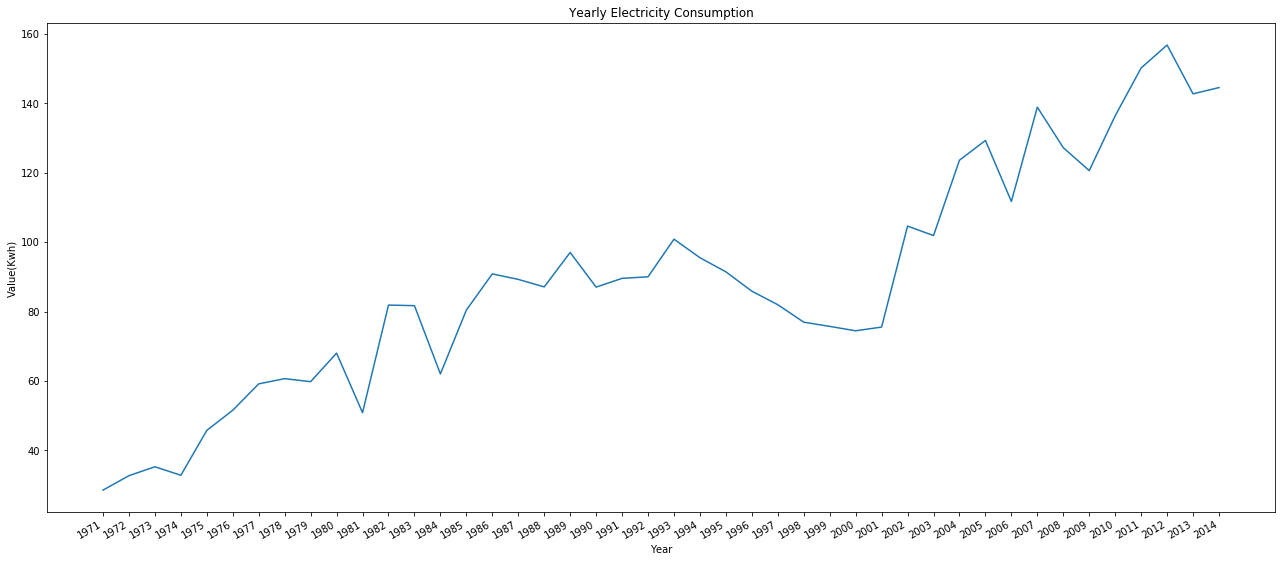

In [128]:
fig, ax = plt.subplots(figsize=(22,10))
sns.lineplot(data=Table,x="Year",y="Value(Kwh)")
fig.autofmt_xdate()
plt.title("Yearly Electricity Consumption")
plt.show()


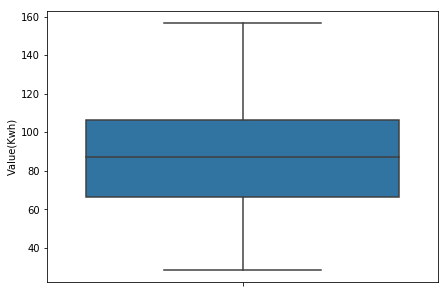

In [129]:
plt.figure(figsize=(7,5))
sns.boxplot(data=Table,y="Value(Kwh)")